In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/car_age_price.csv')

In [3]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
df.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [6]:
df.shape

(112, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,112.0,2016.669643,1.629616,2013.0,2015.0,2017.0,2017.0,2020.0
Price,112.0,483866.044643,91217.450533,300000.0,423750.0,500000.0,550000.0,755000.0


In [10]:
df.isna().sum()

,0
Year,0
Price,0


In [13]:
df.duplicated().sum()

np.int64(54)

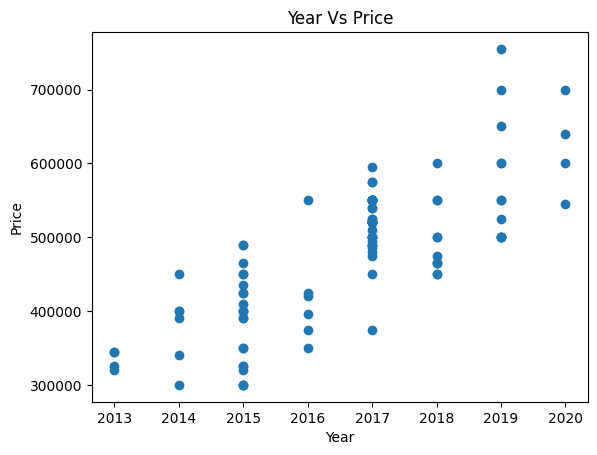

In [21]:
plt.scatter(df.iloc[ : ,0],df.iloc[ : ,1])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year Vs Price')
plt.show()

In [20]:
df.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.shape

(58, 2)

In [32]:
X = df[['Year']]
y = df[['Price']]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred_lr = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred_lr)

0.5118573728808592

In [42]:
print("Linear RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear RMSE: 63270.10351857145


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter=10000)
param_grid = {"alpha":[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(lasso, param_grid, cv=5, scoring="r2")
grid.fit(X_train_scaled, y_train)

best_lasso = grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)

In [45]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R2:", r2_score(y_test, y_pred_lasso))

RMSE: 63269.18428895529
R2: 0.5118715568911639


In [49]:
model.predict([[2022]])[0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([729315.87629543])

In [50]:
best_lasso.predict(scaler.transform([[2022]]))[0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(729288.8138907889)